# The Central Limit Theorem

In [ ]:
from google.colab import files
file_uploaded = files.upload()

Saving united_summer2015.csv to united_summer2015.csv


In [ ]:
# Import dataset united_summer2015.csv
united = pd.read_csv('united_summer2015.csv')
united

,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
...,...,...,...,...
13820,8/31/15,1978,LAS,-4
13821,8/31/15,1993,IAD,8
13822,8/31/15,1994,ORD,3
13823,8/31/15,2000,PHX,-1


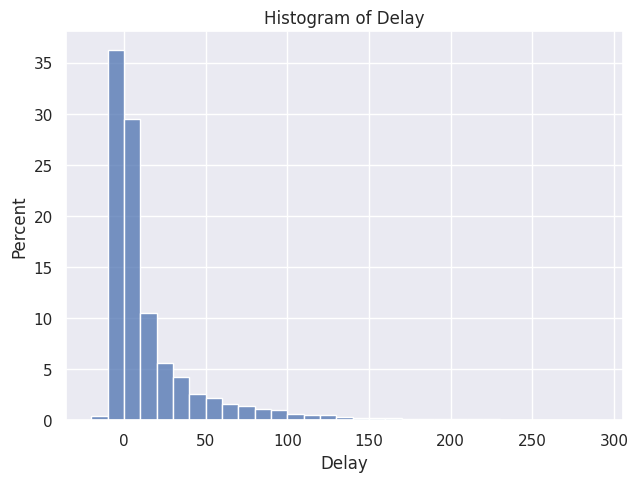

In [ ]:
fig, ax = plt.subplots()
sns.set(style="darkgrid")

ubins = np.arange(-20, 300, 10)
ax=sns.histplot(data=united, x="Delay", \
                bins=ubins, stat="percent")

ax.set_title("Histogram of Delay")
ax.set_xlabel("Delay")
ax.set_ylabel("Percent")
plt.show()

In [ ]:
# Mean and SD of Delay
mean_delay = np.mean(united.Delay)
sd_delay = np.std(united.Delay)

mean_delay, sd_delay
# (16.658155515370705, 39.480199851609314)

(16.658155515370705, 39.480199851609314)

sampled 400 delays at random with replacement

In [ ]:
# Extract column Delay from united
delay = united.Delay

In [ ]:
# Generate one value
np.mean(delay.sample(n=400, replace=True, random_state=2023))
# 18.0175

18.0175

In [ ]:
def one_sample_mean(sample_size):
    """
    Takes a sample from the population of flights
    and computes its mean
    """
    sampled_flights = united.sample(sample_size, replace=True)
    return np.mean(sampled_flights['Delay'])

In [ ]:
one_sample_mean(100)

14.98

In [ ]:
def ten_thousand_sample_means(sample_size):
    means = np.array([])
    for i in np.arange(10000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

In [ ]:
sample_means = ten_thousand_sample_means(100)
results_100 = pd.DataFrame({'Sample Mean': sample_means})
results_100

,Sample Mean
0,24.87
1,16.82
2,15.20
3,18.19
4,18.70
...,...
9995,16.35
9996,20.95
9997,8.98
9998,19.45


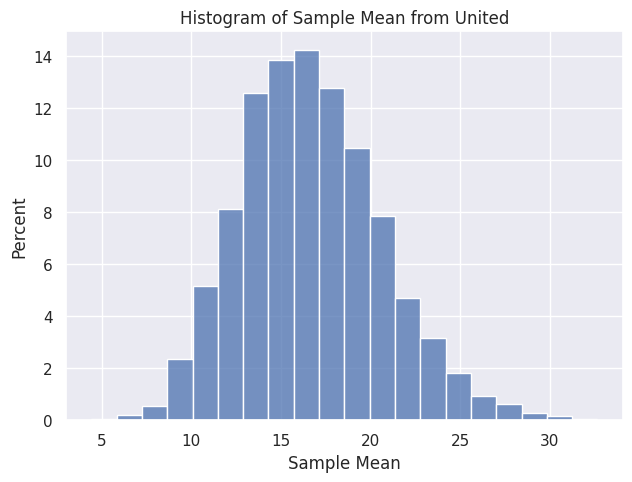

In [ ]:
import seaborn as sns
fig, ax = plt.subplots()
sns.set(style="darkgrid")

ax=sns.histplot(data=results_100, x="Sample Mean", \
                bins=20, stat="percent")

ax.set_title("Histogram of Sample Mean from United")
ax.set_xlabel("Sample Mean")
ax.set_ylabel("Percent")
plt.show()

In [ ]:
sample_means = ten_thousand_sample_means(400)
results_400 = pd.DataFrame({'Sample Mean': sample_means})
results_400

,Sample Mean
0,14.8550
1,17.6100
2,17.9250
3,21.0625
4,16.5500
...,...
9995,17.9175
9996,14.5475
9997,15.9725
9998,18.6675


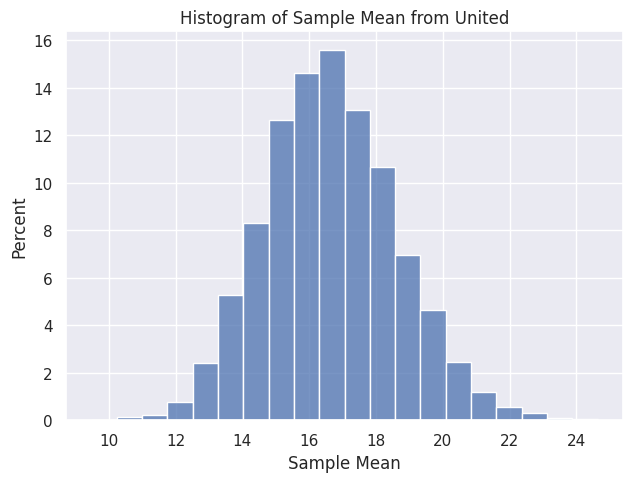

In [ ]:
import seaborn as sns
fig, ax = plt.subplots()
sns.set(style="darkgrid")

ax=sns.histplot(data=results_400, x="Sample Mean", \
                bins=20, stat="percent")

ax.set_title("Histogram of Sample Mean from United")
ax.set_xlabel("Sample Mean")
ax.set_ylabel("Percent")
plt.show()

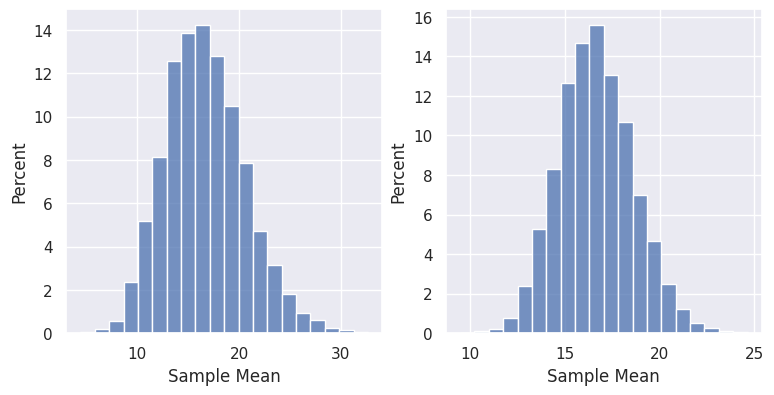

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(1,2, figsize=(8, 4))
sns.set(style="darkgrid")

#bins=np.arange(0,101,5)
ax=sns.histplot(data=results_100, x="Sample Mean", \
                bins=20, stat="percent", ax=axes[0])
ax=sns.histplot(data=results_400, x="Sample Mean", \
                bins=20, stat="percent", ax=axes[1])

plt.show()

# The Variability of the Sample Mean

Distribution of the Sample Average


In [ ]:
united = pd.read_csv('united_summer2015.csv')


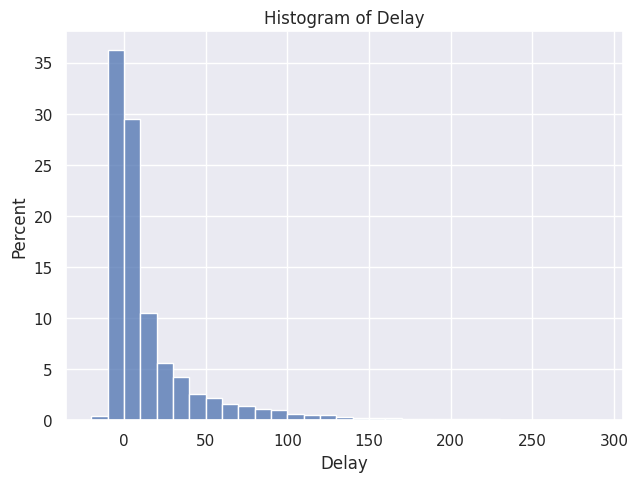

In [ ]:
fig, ax = plt.subplots()
sns.set(style="darkgrid")

ubins = np.arange(-20, 300, 10)
ax=sns.histplot(data=united, x="Delay", \
                bins=ubins, stat="percent")

ax.set_title("Histogram of Delay")
ax.set_xlabel("Delay")
ax.set_ylabel("Percent")
plt.show()

In [ ]:
sample_means_400 = ten_thousand_sample_means(400)
sample_means_900 = ten_thousand_sample_means(900)

In [ ]:
means_df = pd.DataFrame({
    '400': sample_means_400,
    '900': sample_means_900,
})
means_df

,400,900
0,18.5725,16.176667
1,12.6025,17.036667
2,18.7125,14.763333
3,21.3975,17.141111
4,20.5475,16.708889
...,...,...
9995,15.4950,15.688889
9996,15.1675,14.792222
9997,19.8950,17.782222
9998,13.5725,15.644444


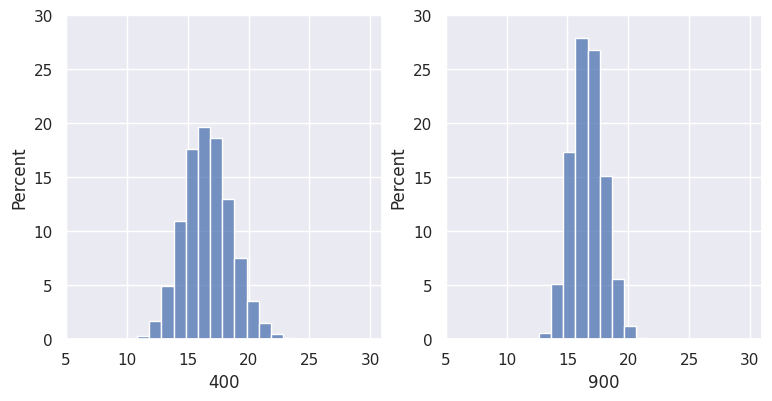

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(1,2, figsize=(8, 4))
sns.set(style="darkgrid")

bins = np.arange(5, 31, 0.5)
ax=sns.histplot(data=means_df, x="400", \
                bins=bins, stat="percent", \
                discrete=True, ax=axes[0])
ax.set_xlim(5,31)
ax.set_ylim(0,30)
ax=sns.histplot(data=means_df, x="900", \
                bins=bins, stat="percent", \
             discrete=True, ax=axes[1])
ax.set_xlim(5,31)
ax.set_ylim(0,30)

plt.show()

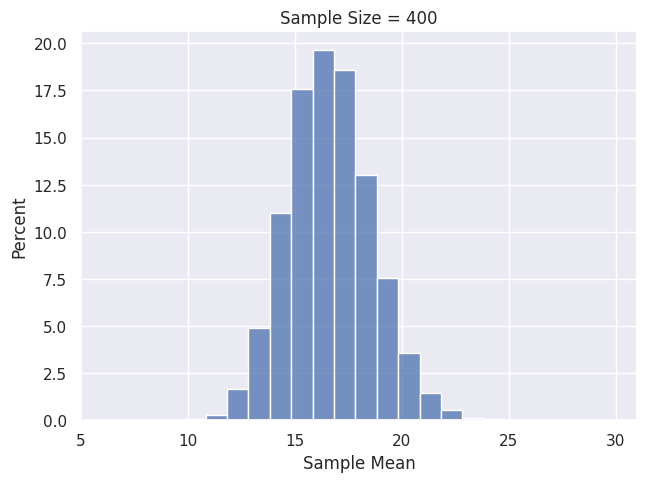

In [ ]:
import seaborn as sns
fig, ax = plt.subplots()

bins = np.arange(5, 31, 0.5)
ax=sns.histplot(data=means_df, x="400", \
                bins=bins, stat="percent", discrete=True)

ax.set_title("Sample Size = 400")
ax.set_xlim(5,31)
ax.set_xlabel("Sample Mean")
ax.set_ylabel("Percent")
plt.show()

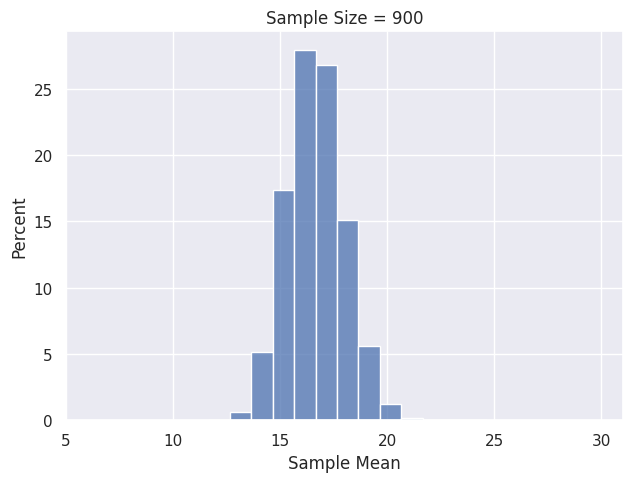

In [ ]:
import seaborn as sns
fig, ax = plt.subplots()

bins = np.arange(5, 31, 0.5)
ax=sns.histplot(data=means_df, x="900", \
                bins=bins, stat="percent", discrete=True)

ax.set_title("Sample Size = 900")
ax.set_xlim(5,31)
ax.set_xlabel("Sample Mean")
ax.set_ylabel("Percent")
plt.show()

In [ ]:
melted=pd.melt(means_df, var_name='Size', value_name='Sample Mean')
melted

,Size,Sample Mean
0,400,18.572500
1,400,12.602500
2,400,18.712500
3,400,21.397500
4,400,20.547500
...,...,...
19995,900,15.688889
19996,900,14.792222
19997,900,17.782222
19998,900,15.644444


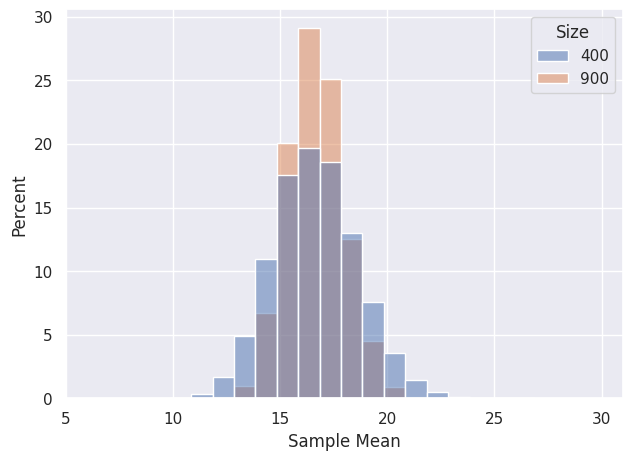

In [ ]:
import seaborn as sns
fig, ax = plt.subplots()

bins = np.arange(5, 31, 0.5)
ax=sns.histplot(data=melted, x="Sample Mean",\
              hue="Size", bins=bins, \
              stat="percent", common_norm=False, discrete=True)
ax.set_xlim(5,31)
ax.set_xlabel("Sample Mean")
ax.set_ylabel("Percent")

plt.show()


Relationship Between Population SD and Sample Size


In [ ]:
def simulate_sample_mean(table, label, sample_size, repetitions):
    """Empirical distribution of random sample means"""
    # Make an array mean for storing sample means
    means = np.array([])

    for i in range(repetitions):
        new_sample = table.sample(n=sample_size, replace=False).reset_index(drop=True)
        new_sample_mean = np.mean(new_sample[label])
        means = np.append(means, new_sample_mean)

    # Store means in DataFrame sample_means
    sample_means = pd.DataFrame({'Sample Means': means})

    print("Sample size: ", sample_size)
    print("Population mean:", np.mean(table[label]))
    print("Average of sample means: ", np.mean(means))
    print("Population SD:", np.std(table[label]))
    print("SD of sample means:", np.std(means))

    # Display empirical histogram and print all relevant quantities
    # Histogram of Delay: Sample
    ax=sns.histplot(data=sample_means, x="Sample Means",\
              bins=20, stat="percent", discrete=True)

    # Set layout
    ax.set_xlim(5,35)
    ax.set_ylim(0,30)
    ax.set_ylabel("Percent")
    ax.set_title('Histogram of ' + label + ' from Table +  Sample Size = ' + str(sample_size))

    plt.show()

Sample size:  100
Population mean: 16.658155515370705
Average of sample means:  16.630158
Population SD: 39.480199851609314
SD of sample means: 3.954500288915908


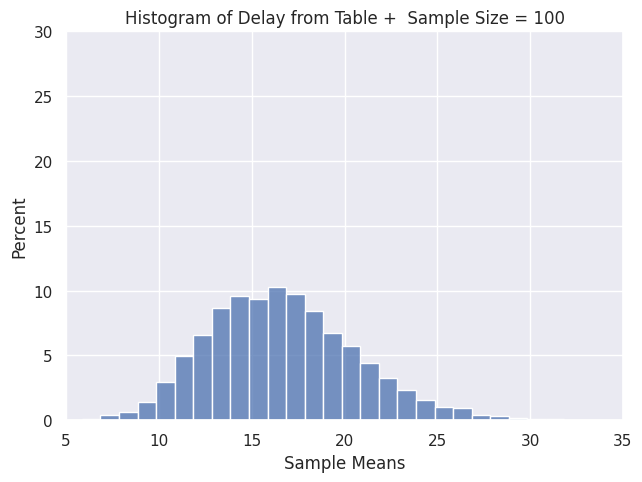

In [ ]:
simulate_sample_mean(united, 'Delay', 100, 10000)

In [ ]:
39.48/3.95

9.994936708860758

Sample size:  400
Population mean: 16.658155515370705
Average of sample means:  16.6586755
Population SD: 39.480199851609314
SD of sample means: 1.955372481958297


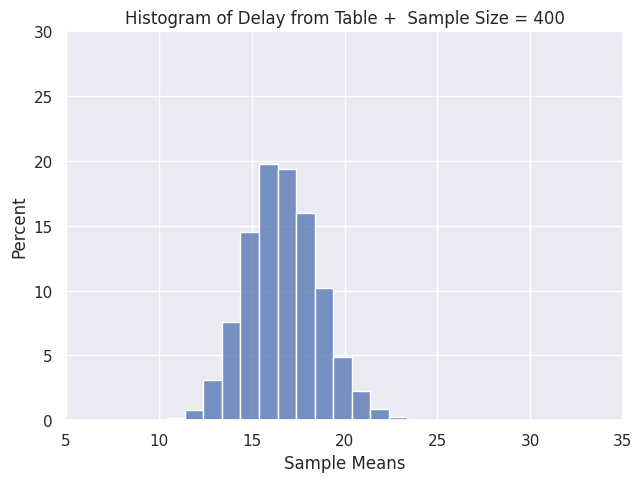

In [ ]:
simulate_sample_mean(united, 'Delay', 400, 10000)

In [ ]:
39.48/1.95

20.246153846153845

Sample size:  625
Population mean: 16.658155515370705
Average of sample means:  16.656704799999996
Population SD: 39.480199851609314
SD of sample means: 1.524284357941444


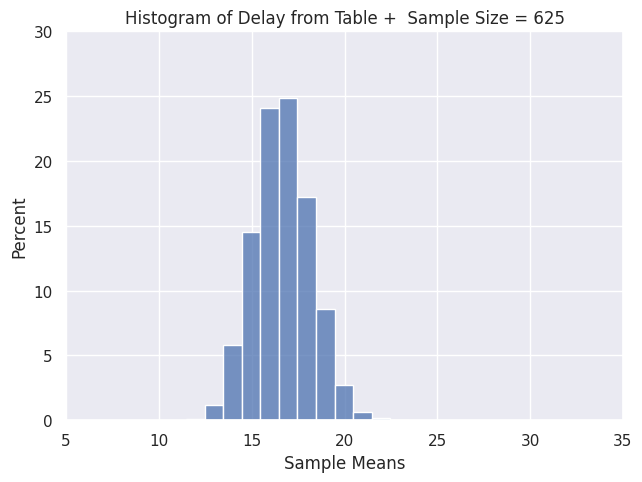

In [ ]:
simulate_sample_mean(united, 'Delay', 625, 10000)

In [ ]:
39.48/1.52

25.973684210526315

Variability of the Sample Mean

In [ ]:
# Warning: this cell will take a long time to run!
sample_sizes = np.arange(100, 950, 50)

sample_mean_sds =  np.array([])
for n in sample_sizes:
    sample_means = ten_thousand_sample_means(n)
    sample_mean_sds = np.append(sample_mean_sds, np.std(sample_means))

In [ ]:
population_sd = np.std(delay)

In [ ]:
population_sd = np.std(delay)
sd_table = pd.DataFrame({
    'Sample size': sample_sizes,
    'SD of simulated sample means': sample_mean_sds,
    'Pop SD / sqrt(sample size)': population_sd / np.sqrt(sample_sizes),
})
sd_table

,Sample size,SD of simulated sample means,Pop SD / sqrt(sample size)
0,100,3.932110,3.948020
1,150,3.188478,3.223545
2,200,2.805888,2.791672
3,250,2.498979,2.496947
4,300,2.271327,2.279390
5,350,2.109137,2.110305
6,400,1.983431,1.974010
7,450,1.881630,1.861114
8,500,1.777432,1.765608
9,550,1.681981,1.683441


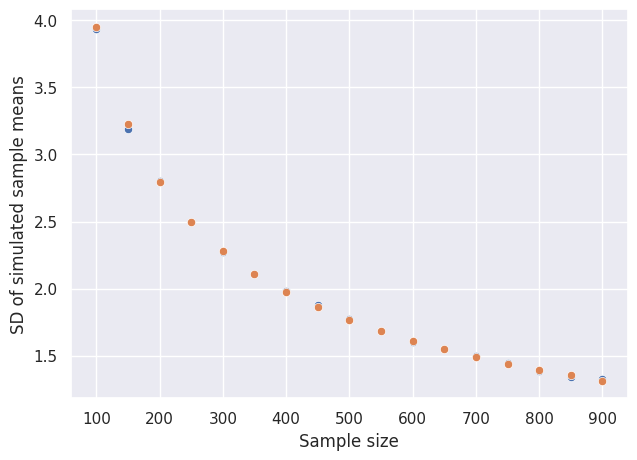

In [ ]:
# Line Chart
import seaborn as sns
sns.set(style="darkgrid")
fig, ax = plt.subplots()

ax = sns.scatterplot(data=sd_table,  x='Sample size', y='SD of simulated sample means')
ax = sns.scatterplot(data=sd_table,  x='Sample size', y='Pop SD / sqrt(sample size)')


plt.show()

In [ ]:
sd_melted= pd.melt(sd_table, id_vars=['Sample size'])
sd_melted

,Sample size,variable,value
0,100,SD of simulated sample means,3.932110
1,150,SD of simulated sample means,3.188478
2,200,SD of simulated sample means,2.805888
3,250,SD of simulated sample means,2.498979
4,300,SD of simulated sample means,2.271327
5,350,SD of simulated sample means,2.109137
6,400,SD of simulated sample means,1.983431
7,450,SD of simulated sample means,1.881630
8,500,SD of simulated sample means,1.777432
9,550,SD of simulated sample means,1.681981


In [ ]:
import seaborn as sns
sns.set(style="darkgrid")
fig, ax = plt.subplots()

ax = sns.scatterplot(data=sd_melted,  x='Sample size', y='value', \
                     hue='variable', s=50)
plt.show()

NameError: ignored

Other distributions


In [ ]:
from google.colab import files
file_uploaded = files.upload()

Saving san_francisco_2019.csv to san_francisco_2019.csv


In [ ]:
sf_salaries = pd.read_csv('san_francisco_2019.csv')
sf_salaries



,Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
0,Public Protection,Adult Probation,Information Systems,IS Trainer-Journey,91332.0,0.0,40059.0,131391.0
1,Public Protection,Adult Probation,Information Systems,IS Engineer-Assistant,123241.0,0.0,49279.0,172520.0
2,Public Protection,Adult Probation,Information Systems,IS Business Analyst-Senior,115715.0,0.0,46752.0,162468.0
3,Public Protection,Adult Probation,Information Systems,IS Business Analyst-Principal,159394.0,0.0,57312.0,216706.0
4,Public Protection,Adult Probation,Information Systems,IS Programmer Analyst,70035.0,0.0,28671.0,98706.0
...,...,...,...,...,...,...,...,...
44520,General Administration & Finance,Treasurer/Tax Collector,Revenue,"Investigator, Tax Collector",44961.0,42.0,19546.0,64549.0
44521,General Administration & Finance,Treasurer/Tax Collector,Revenue,"Investigator, Tax Collector",85706.0,107.0,38924.0,124737.0
44522,General Administration & Finance,Treasurer/Tax Collector,Revenue,"Investigator, Tax Collector",101403.0,0.0,43185.0,144587.0
44523,General Administration & Finance,Treasurer/Tax Collector,Revenue,"Pr Investigator, Tax Collector",113738.0,397.0,47104.0,161240.0


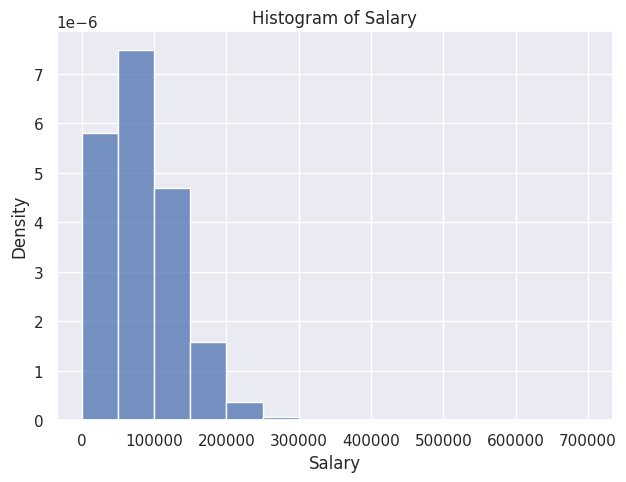

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")

fig, ax = plt.subplots()
sf_bins = np.arange(0, 726000, 50000)
ax=sns.histplot(data=sf_salaries, x="Salary", \
                bins=sf_bins, stat="density")

ax.set_title("Histogram of Salary")
ax.set_xlabel("Salary")
ax.set_ylabel("Density")
plt.show()

In [ ]:
def one_sample_mean(sample_size):
    """Take a sample from the population of flights and compute its mean"""
    sampled_salaries = sf_salaries.sample(sample_size)
    return np.mean(sampled_salaries['Salary'])

In [ ]:
def ten_thousand_sample_means(sample_size):
    """Approximate the distribution of the sample mean"""
    means = np.array([])
    for i in np.arange(10000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

In [ ]:
sample_means_400 = ten_thousand_sample_means(400)
results_400 = pd.DataFrame({'Sample Mean': sample_means_400})
results_400


,Sample Mean
0,24.87
1,16.82
2,15.20
3,18.19
4,18.70
...,...
9995,16.35
9996,20.95
9997,8.98
9998,19.45


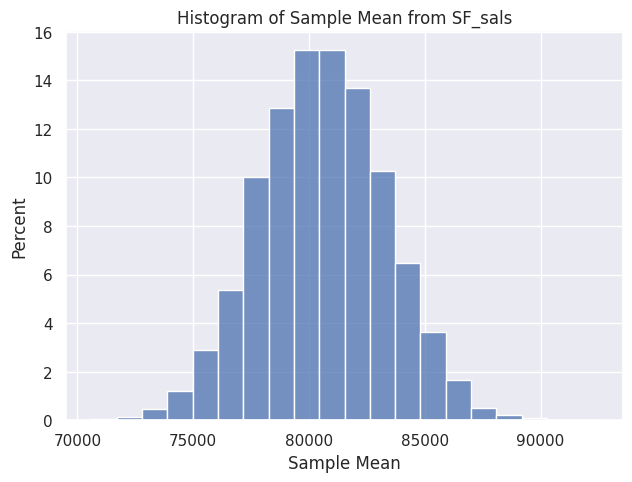

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")

fig, ax = plt.subplots()
ax=sns.histplot(data=results_400, x="Sample Mean", \
                bins=20, stat="percent")

ax.set_title("Histogram of Sample Mean from SF_sals")
ax.set_xlabel("Sample Mean of 400 Salaries")
ax.set_ylabel("Percent")
plt.show()

In [ ]:
sns.set(style="darkgrid")Table().with_column('Mean of 400 salaries', sample_means_400).hist(bins=20)
print('Population Average:', np.mean(sf_salaries.column("Salary")))
